In [ ]:
!pip install awscli
!aws configure

In [ ]:
# Install some additional libraries required, before the rest are imported.
!pip install torchmetrics
!pip install pytorch-lightning
!pip install wandb

In [ ]:
# Download data from S3.
# This will stay on this machine only as long as the session is active, and will be deleted afterwards.
!aws s3 cp --recursive s3://uoftremmiedata/diagnosis_images ./data

In [ ]:
shutil.rmtree('/content/annotations/')
shutil.rmtree('/content/annotations-partitioned/')
shutil.rmtree('/content/images/')

In [ ]:
!aws s3 cp --recursive s3://uoftremmiedata/annotations_v5_object_detection ./annotations-partitioned
!aws s3 cp --recursive s3://uoftremmiedata/diagnosis_images ./images

In [ ]:
import glob
import json
import shutil
import os

# Un-partition the annotated images.
# Also, name the files using the same structure as images, for easier lookup.
!rm -rf annotations
!mkdir annotations

for path in glob.glob("annotations-partitioned/*/*"):

  with open(path, "r") as annotation_file:
    annotation_json = json.load(annotation_file)


    # Extract the image name that this annotation was made for.
    # This will be an S3 URL, of the form s3:/path/to/CLASS/NAME.jpeg
    image_resource = annotation_json["task"]["data"]["image"]
    path_components = image_resource.split("/")
    image_class, image_filename = path_components[-2:]

    # Remove the extension from the image name, for our annotation file.
    #image_name = "".join(image_filename.split(".")[:-1])

    # Mirror the data directory structure.
    if image_filename:
      output_dir = os.path.join("annotations", image_class)
      if not os.path.exists(output_dir):
        os.makedirs(output_dir)
      
      input_dir = os.path.join("images", image_class,image_filename )
      

      # Instead of just copying, also pretty-print the annotation for ease of use.
      shutil.copyfile(input_dir, os.path.join(output_dir, f"{image_filename}"))
      # with open(os.path.join(output_dir, f"{image_filename}"), "w") as output_file:
      
      #   json.dump(annotation_json, output_file, indent=2)

In [ ]:
#standard imports
import cv2
import numpy as np
import os
from distutils.dir_util import copy_tree
import shutil


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def binary_classification_small_dataset():

  # #make new folders: OM and Not_OM
  try:
    shutil.rmtree('/content/annotations/OM')
    shutil.rmtree('/content/annotations/Not_OM')
  except:
    pass

  os.mkdir("/content/annotations/OM")
  os.mkdir("/content/annotations/Not_OM")

  #copy all OM classification into OM
  copy_tree("/content/annotations/OME_(Serous_OM)","/content/annotations/OM") 
  copy_tree("/content/annotations/AOM","/content/annotations/OM") 
  copy_tree("/content/annotations/ASOM","/content/annotations/OM") 
  copy_tree("/content/annotations/CSOM","/content/annotations/OM") 

  #copy all other diagnosis into Not_OM folder 
  copy_tree("/content/annotations/Abnormal_Pinna","/content/annotations/Not_OM") 
  copy_tree("/content/annotations/Foreign_Body","/content/annotations/Not_OM") 
  copy_tree("/content/annotations/Fungal_Infection","/content/annotations/Not_OM") 
  copy_tree("/content/annotations/Impacted_Wax","/content/annotations/Not_OM") 
  copy_tree("/content/annotations/Inflammation_of_Pinna","/content/annotations/Not_OM") 
  copy_tree("/content/annotations/Nose_Throat Disorders","/content/annotations/Not_OM")
  copy_tree("/content/annotations/Otitis_Externa","/content/annotations/Not_OM") 
  copy_tree("/content/annotations/Normal","/content/annotations/Not_OM") 

  #delete the unneeded folders
  shutil.rmtree('/content/annotations/Diminished_Hearing')
  shutil.rmtree('/content/annotations/Tinnitus')
  shutil.rmtree('/content/annotations/OME_(Serous_OM)')
  shutil.rmtree('/content/annotations/AOM')
  shutil.rmtree('/content/annotations/ASOM')
  shutil.rmtree('/content/annotations/CSOM')
  shutil.rmtree('/content/annotations/Normal')
  shutil.rmtree('/content/annotations/Abnormal_Pinna')
  shutil.rmtree('/content/annotations/Foreign_Body')
  shutil.rmtree('/content/annotations/Fungal_Infection')
  shutil.rmtree('/content/annotations/Impacted_Wax')
  shutil.rmtree('/content/annotations/Inflammation_of_Pinna')
  shutil.rmtree('/content/annotations/Nose_Throat Disorders')
  shutil.rmtree('/content/annotations/Otitis_Externa')


In [ ]:
def binary_classification():

  # #make new folders: OM and Not_OM
  os.mkdir("/content/data/OM")
  os.mkdir("/content/data/Not_OM")

  #copy all OM classification into OM
  copy_tree("/content/data/OME_(Serous_OM)","/content/data/OM") 
  copy_tree("/content/data/AOM","/content/data/OM") 
  copy_tree("/content/data/ASOM","/content/data/OM") 
  copy_tree("/content/data/CSOM","/content/data/OM") 

  #copy all other diagnosis into Not_OM folder 
  copy_tree("/content/data/Abnormal_Pinna","/content/data/Not_OM") 
  copy_tree("/content/data/Foreign_Body","/content/data/Not_OM") 
  copy_tree("/content/data/Fungal_Infection","/content/data/Not_OM") 
  copy_tree("/content/data/Impacted_Wax","/content/data/Not_OM") 
  copy_tree("/content/data/Inflammation_of_Pinna","/content/data/Not_OM") 
  copy_tree("/content/data/Nose_Throat Disorders","/content/data/Not_OM")
  copy_tree("/content/data/Otitis_Externa","/content/data/Not_OM") 
  copy_tree("/content/data/Normal","/content/data/Not_OM") 

  #delete the unneeded folders
  shutil.rmtree('/content/data/Diminished_Hearing')
  shutil.rmtree('/content/data/Tinnitus')
  shutil.rmtree('/content/data/OME_(Serous_OM)')
  shutil.rmtree('/content/data/AOM')
  shutil.rmtree('/content/data/ASOM')
  shutil.rmtree('/content/data/CSOM')
  shutil.rmtree('/content/data/Normal')
  shutil.rmtree('/content/data/Abnormal_Pinna')
  shutil.rmtree('/content/data/Foreign_Body')
  shutil.rmtree('/content/data/Fungal_Infection')
  shutil.rmtree('/content/data/Impacted_Wax')
  shutil.rmtree('/content/data/Inflammation_of_Pinna')
  shutil.rmtree('/content/data/Nose_Throat Disorders')
  shutil.rmtree('/content/data/Otitis_Externa')



In [ ]:
folders = [r"/content/annotations/AOM",
        r"/content/annotations/ASOM",
        r"/content/annotations/CSOM",
        r"/content/annotations/Abnormal_Pinna",
        r"/content/annotations/Diminished_Hearing",
        r"/content/annotations/Foreign_Body",
        r"/content/annotations/Fungal_Infection",
        r"/content/annotations/Impacted_Wax",
        r"/content/annotations/Inflammation_of_Pinna",
        r"/content/annotations/Normal",
        r"/content/annotations/Nose_Throat Disorders",
        r"/content/annotations/OME_(Serous_OM)",
        r"/content/annotations/Otitis_Externa",
        r"/content/annotations/Tinnitus",
        ]

In [ ]:
# number of data points that do not have om
counts = {}
master_len = 0
for p in folders:
  count= 0
  topic = p.split('/')[-1]
  print (topic)

  for root_dir, cur_dir, files in os.walk(p):
      count += len(files)
      print (count)
  master_len += count
  counts[topic] = count

print (master_len)
for key in counts.keys():
  print(key +' number of images:', counts[key], 'percentage: ',  round(counts[key]/ master_len*100,2))

AOM
15
ASOM
223
CSOM
144
Abnormal_Pinna
31
Diminished_Hearing
179
Foreign_Body
249
Fungal_Infection
250
Impacted_Wax
15
Inflammation_of_Pinna
15
Normal
15
Nose_Throat Disorders
15
OME_(Serous_OM)
15
Otitis_Externa
15
Tinnitus
15
1196
AOM number of images: 15 percentage:  1.25
ASOM number of images: 223 percentage:  18.65
CSOM number of images: 144 percentage:  12.04
Abnormal_Pinna number of images: 31 percentage:  2.59
Diminished_Hearing number of images: 179 percentage:  14.97
Foreign_Body number of images: 249 percentage:  20.82
Fungal_Infection number of images: 250 percentage:  20.9
Impacted_Wax number of images: 15 percentage:  1.25
Inflammation_of_Pinna number of images: 15 percentage:  1.25
Normal number of images: 15 percentage:  1.25
Nose_Throat Disorders number of images: 15 percentage:  1.25
OME_(Serous_OM) number of images: 15 percentage:  1.25
Otitis_Externa number of images: 15 percentage:  1.25
Tinnitus number of images: 15 percentage:  1.25


In [ ]:
# turn dataset into binary classification
binary_classification()

# number of data points that do not have om
count_not_om = 0
for root_dir, cur_dir, files in os.walk(r"/content/data/Not_OM"):
    count_not_om += len(files)

# number of data points that have om
count_om = 0
for root_dir, cur_dir, files in os.walk(r"/content/data/OM"):
    count_om += len(files)

total_number_files = count_not_om+count_om
print('number of images without om:', count_not_om, 'percentage: ', count_not_om/ total_number_files)
print('number of images with om:', count_om, 'percentage: ',count_om/ total_number_files)

In [ ]:
# turn dataset into binary classification
binary_classification_small_dataset()

# number of data points that do not have om
count_not_om = 0
for root_dir, cur_dir, files in os.walk(r"/content/annotations/Not_OM"):
    count_not_om += len(files)

# number of data points that have om
count_om = 0
for root_dir, cur_dir, files in os.walk(r"/content/annotations/OM"):
    count_om += len(files)

total_number_files = count_not_om+count_om
print('number of images without om:', count_not_om, 'percentage: ', count_not_om/ total_number_files)
print('number of images with om:', count_om, 'percentage: ',count_om/ total_number_files)

number of images without om: 605 percentage:  0.6037924151696606
number of images with om: 397 percentage:  0.3962075848303393


In [ ]:
# General imports.
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler

import math

from PIL import Image

import torch
import torchmetrics
import torchvision.datasets
import torchvision.transforms
import torch.utils.data

import pytorch_lightning as pl

import matplotlib.pyplot as plt
import wandb
# Enable reproducible results.
torch.manual_seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# The provided dataset consists of rectangular images.
# These contain a label in the bottom left, and a central circular image.
# Throw away a bit to make sure the borders are completely gone.
# We are conservative and throw away a bit to make sure the borders are completely gone.
CIRCULAR_IMAGE_RADIUS = int(950 * 0.95)
 
# However, it's far easier to work with square images.
# So, for now, we simply consider the largest square inscribed in the circle.
SQUARE_IMAGE_WIDTH = (2 * CIRCULAR_IMAGE_RADIUS) / math.sqrt(2)



# When we load the dataset, it will contain both train and test.
# So, we only apply a limited set of transforms that should be used on both.
universal_transforms = torchvision.transforms.Compose([
  # The image naturally contains a border, which should be removed.
  torchvision.transforms.CenterCrop(SQUARE_IMAGE_WIDTH),
  torchvision.transforms.Compose([torchvision.transforms.Resize((150))]),

  # Autocontrast applies a somewhat adaptive contrast,
  # clamping the darkest pixel to black, the lightes to white, and interpolating.
  # We could use a manual contrast, but this risks overcontrasting some images
  # (what oversat is to white, overcontrast is to black)
  # Note that this is why we're conservative with the crop above, if any
  # of the black border remains, it will skew the clamp.
  torchvision.transforms.RandomAutocontrast(1),
  torchvision.transforms.PILToTensor(),
  torchvision.transforms.ConvertImageDtype(torch.float),
])

# apply the transform to the dataset
dataset = torchvision.datasets.ImageFolder("./annotations", transform=universal_transforms)

In [ ]:
# display the image
def show_image(dataset, number):
  plt.imshow(dataset[number][0].permute(1, 2, 0))

In [ ]:
/content/annotations/Not_OM/600c110fb1a784001d12f5b5_05a878aaeffa42499c05e42d_Left Ear.png
/content/data/Not_OM/5fc383dd5c3736236c0f77e4_5fc3887a5c3736236c27a062_Left Ear


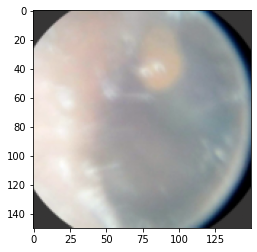

In [ ]:
show_image(dataset, 1)

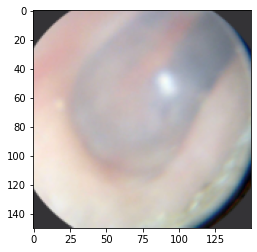

In [ ]:
show_image(dataset, 25)
#4, 5, 6, 7, 8, 9, 10, 11, 12, 13

In [ ]:
# split data into train/test split
TRAIN_SPLIT = 0.6
VAL_SPLIT = 0.3

# train, val, test
split_train = int(len(dataset) * TRAIN_SPLIT)
split_val = int(len(dataset) * VAL_SPLIT)
split_test = len(dataset) - split_train - split_val

# randomly split the dataset
dataset_train, dataset_val, dataset_test = torch.utils.data.random_split(dataset, [split_train, split_val, split_test], generator=torch.Generator().manual_seed(42))

In [ ]:
# Apply augmentation to training dataset.
# Note, although this looks like it is only applied once,
batch_size = 200
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size, True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, 1, False)

# This should be called to augment X during each training iteration.
# I.e, x' = apply_augmentation(x), pass x' to the actual model.
apply_augmentation = torchvision.transforms.Compose([
  torchvision.transforms.ConvertImageDtype(torch.uint8),
  torchvision.transforms.Compose([torchvision.transforms.Resize((150))]),
  torchvision.transforms.AutoAugment(),
  torchvision.transforms.ConvertImageDtype(torch.float)
])

In [ ]:
# AlexNet Model
# https://blog.paperspace.com/alexnet-pytorch/
class AlexNet(nn.Module):
    def __init__(self, num_classes=2):
        super(AlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(2304  , 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        #print (out.size(1))
        out = self.layer2(out)
        #print (out.size(1))
        out = self.layer3(out)
        #print (out.size(1))
        out = self.layer4(out)
        #print (out.size(1))
        out = self.layer5(out)
        #print (out.size())
        out = out.reshape(out.size(0), -1)
        #print (out.size())
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
# log into weights and bias
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# Train the model
num_classes = 2

# model hyperparameters
num_epochs = 20
learning_rate = 0.01
w_d = 0.045
m =  0.08

# define the model
model = AlexNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = w_d, momentum =m)  

# store the hyperparameters in weights and bias
wandb.init(project="OM-detection-toy-dataset", entity="remmie-uoft",
           config= {
  "learning_rate":learning_rate,
  "epochs": num_epochs,
  "batch_size": batch_size,
  "num_classes":num_classes,
  "model":"AlexNet",
  "architecture": "CNN",
  "data":"Remmie Ears",
  'weight_decay': w_d, 
  'momentum' :m
}
)



# steps
steps = len(dataloader_train)

# percision and recall functions
precision = torchmetrics.Precision(average='macro', num_classes=2,  multiclass = True)
recall = torchmetrics.Recall(average='macro', num_classes=2,  multiclass = True)

# store loss, accuracy, precision, recall for each epoch on train and val
epoch_loss_train = []
epoch_accuracy_train = []
epoch_precision_train = []
epoch_recall_train = []

epoch_loss_val = []
epoch_accuracy_val = []
epoch_precision_val = []
epoch_recall_val = []

# train loop
for epoch in range(num_epochs):
    
    # for accuarcy 
    correct, total = 0, 0
    preds, target = [], []

    # iterate each pass of the dataset
    for i, (images, labels) in enumerate(dataloader_train):  

        # Move tensors to the configured device
        images = images.to(device) #.unsqueeze(0)
        labels = labels.to(device)
  
        # Forward pass
        outputs = model(images)
               
        # loss function
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        total += labels.size(0) # number of training points

        _, predicted = torch.max(outputs.data, 1) # model results
        correct += (predicted == labels).sum().item() # number of correct parts

        # predicted and target
        preds += predicted.tolist()
        target +=  labels.tolist()

    # change type back to tensor
    preds = torch.Tensor(preds)
    target = torch.tensor(target)

    # store the epoch
    epoch_loss_train += [loss.item()]
    epoch_accuracy_train += [correct / total]
    epoch_precision_train += [precision(preds, target)]
    epoch_recall_train += [recall(preds, target)]

    # log model results
    wandb.log({"train_loss": epoch_loss_train[-1], 
               "train_accuracy": epoch_accuracy_train[-1], 
               "train_precision": epoch_precision_train[-1], 
               "train_recall": epoch_recall_train[-1], })
    
    wandb.watch(model)

    # print results
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f},  Accuracy: {:.4f},  Precision: {:.4f},  Recall: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, steps, epoch_loss_train[-1], 100 * epoch_accuracy_train[-1],epoch_precision_train[-1],epoch_recall_train[-1]))
            
    # Validation loop
    with torch.no_grad():
         # for accuarcy 
        correct, total = 0, 0
        preds, target = [], []

        # iterate each pass of the dataset
        for images, labels in dataloader_val:
            images = images.to(device)
            labels = labels.to(device)

            # model results
            outputs =  model(images)

            # loss
            loss = criterion(outputs, labels)

            # model prediction
            _, predicted = torch.max(outputs.data, 1)


            total += labels.size(0) # number of values in this subset of the data
            correct += (predicted == labels).sum().item() # number of points model got correct

            # store model results
            target += labels.tolist()
            preds += predicted.tolist()
            
        # transform into tensor
        preds = torch.Tensor(preds)
        target = torch.tensor(target)

        # store resulst for the pass through
        epoch_loss_val += [loss.item()]
        epoch_accuracy_val += [correct / total]
        epoch_precision_val += [precision(preds, target)]
        epoch_recall_val += [recall(preds, target)]
        
        # log and print model results
        wandb.log({"val_loss": epoch_loss_val[-1], 
                    "val_accuracy": epoch_accuracy_val[-1], 
                    "val_precision": epoch_precision_val[-1], 
                    "val_recall": epoch_recall_val[-1], })
        wandb.watch(model)
        del images, labels, outputs
        print('Accuracy of the network on the {} validation images: {} % ,  Loss: {:.4f},  Precision: {:.4f},  Recall: {:.4f}'.format(5000, 100 * epoch_accuracy_val[-1], epoch_loss_val[-1],epoch_precision_val[-1], epoch_recall_val[-1])) 

tes_recall,▁
test_accuracy,▁
test_loss,▁
test_precision,▁
train_accuracy,▁▄▁▃▅▄▄▅▅▆▆▆▆▇▆▇█▇██
train_loss,█▄▅▄▃▄▃▄▃▃▃▃▃▃▄▂▂▂▂▁
train_precision,▁▂▁▂▄▄▃▄▅▆▆▆▆▆▆▆█▇▇█
train_recall,▁▂▁▂▄▃▄▃▅▅▆▅▆▆▅▇▇▇▇█
val_accuracy,▅▃▅▆▆▁▆▃▅▃▅▇▄▆▃▇▆█▅█
val_loss,▁█▂▅▄█▄█▂▆▃▆▇▄▇▄▃▅▄▄
val_precision,▁▅▁▅▆▄█▅▁▄▁▅▄▅▅▇▅▆▅▆


Epoch [1/20], Step [3/3], Loss: 0.7520,  Accuracy: 52.9915,  Precision: 0.5169,  Recall: 0.5174
Accuracy of the network on the 5000 validation images: 54.109589041095894 % ,  Loss: 0.1008,  Precision: 0.2705,  Recall: 0.5000
Epoch [2/20], Step [3/3], Loss: 0.9224,  Accuracy: 54.8718,  Precision: 0.5178,  Recall: 0.5167
Accuracy of the network on the 5000 validation images: 45.89041095890411 % ,  Loss: 1.2972,  Precision: 0.2295,  Recall: 0.5000
Epoch [3/20], Step [3/3], Loss: 0.8942,  Accuracy: 44.2735,  Precision: 0.4724,  Recall: 0.4740
Accuracy of the network on the 5000 validation images: 54.109589041095894 % ,  Loss: 0.0688,  Precision: 0.2705,  Recall: 0.5000
Epoch [4/20], Step [3/3], Loss: 0.6150,  Accuracy: 64.9573,  Precision: 0.6368,  Recall: 0.5914
Accuracy of the network on the 5000 validation images: 52.73972602739726 % ,  Loss: 0.3103,  Precision: 0.2674,  Recall: 0.4873
Epoch [5/20], Step [3/3], Loss: 0.6082,  Accuracy: 65.4701,  Precision: 0.6685,  Recall: 0.5831
Accura

In [ ]:
#Test Results

# dataloader train
dataloader_test = torch.utils.data.DataLoader(dataset_test, 1, False)

# store test results
epoch_loss_test = []
epoch_accuracy_test = []
epoch_precision_test = []
epoch_recall_test = []


# run model 
with torch.no_grad():
        # for accuracy 
        correct, total =  0,  0
        preds, target =  [], []

        # model results
        for images, labels in dataloader_test:
            images = images.to(device) #.unsqueeze(0)
            labels = labels.to(device)

            # predictioms
            outputs = model(images)
            # loss
            loss = criterion(outputs, labels)

            # model results
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            target += labels.tolist()
            preds += predicted.tolist()
            

        # transform into tensor
        preds = torch.Tensor(preds)
        target = torch.tensor(target)

        # store resulst for the pass through

        epoch_loss_test += [loss.item()]
        epoch_accuracy_test += [correct / total]
        epoch_precision_test += [precision(preds, target)]
        epoch_recall_test += [recall(preds, target)]
        
        # log and print model results
        wandb.log({"test_loss": epoch_loss_test[-1], 
                    "test_accuracy": epoch_accuracy_test[-1], 
                    "test_precision": epoch_precision_test[-1], 
                    "tes_recall": epoch_recall_test[-1], })
        wandb.watch(model)

print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))   
print ('Recall: ', epoch_recall_test[-1])
print ('Precision: ',epoch_precision_test[-1])
print ('Loss: ', epoch_loss_test[-1])


Accuracy of the network on the 10000 test images: 55.10204081632653 %
Recall:  tensor(0.5330)
Precision:  tensor(0.5290)
Loss:  0.6695348620414734


In [ ]:
precision(preds, target)

tensor(0.3418)

In [ ]:
total

98

In [ ]:
67/98

0.6836734693877551